# BuenColors Single Cell Demo

This notebook demonstrates the single-cell analysis features in BuenColors, designed to work with Scanpy and AnnData objects.

## Installation

To use the single-cell features, you need to have `scanpy` and `anndata` installed:

```bash
pip install buencolors scanpy anndata
```

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import buencolors
import buencolors as bc

# Try importing scanpy and anndata
try:
    import scanpy as sc
    import anndata as ad
    SCANPY_AVAILABLE = True
    print("✓ Scanpy and AnnData are available")
except ImportError as e:
    SCANPY_AVAILABLE = False
    print(f"✗ Scanpy or AnnData not available: {e}")
    print("Please install with: pip install scanpy anndata")

✓ Scanpy and AnnData are available


## Load Example Dataset

We'll use the PBMC3k dataset, a standard example in single-cell analysis that contains ~3000 peripheral blood mononuclear cells.

In [2]:
if SCANPY_AVAILABLE:
    # Load the preprocessed PBMC3k dataset
    adata = sc.datasets.pbmc3k_processed()
    print(f"Dataset shape: {adata.shape}")
    print(f"Available observations: {list(adata.obs.columns)}")
    print(f"\nCell type distribution:")
    print(adata.obs['louvain'].value_counts())

Dataset shape: (2638, 1838)
Available observations: ['n_genes', 'percent_mito', 'n_counts', 'louvain']

Cell type distribution:
louvain
CD4 T cells          1144
CD14+ Monocytes       480
B cells               342
CD8 T cells           316
NK cells              154
FCGR3A+ Monocytes     150
Dendritic cells        37
Megakaryocytes         15
Name: count, dtype: int64


## Clean UMAP Visualization

The `clean_umap()` function creates beautiful, publication-ready UMAP plots with:
- Minimal decorations (no borders, ticks, or frame)
- Custom L-shaped axis indicators with arrowheads
- Automatically ejected legend to the right side
- Shuffled cells to avoid non-random ordering artifacts

### Basic Usage - Cell Type Coloring

<Figure size 1000x800 with 0 Axes>

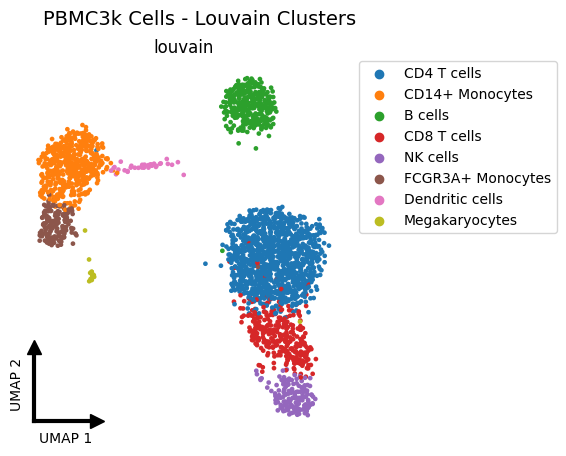

In [3]:
if SCANPY_AVAILABLE:
    # Create a clean UMAP colored by cell type (Louvain clusters)
    plt.figure(figsize=(10, 8))
    bc.clean_umap(adata, color='louvain')
    plt.suptitle('PBMC3k Cells - Louvain Clusters', y=0.98, fontsize=14)
    plt.show()

### Gene Expression Visualization

You can also color cells by gene expression levels:

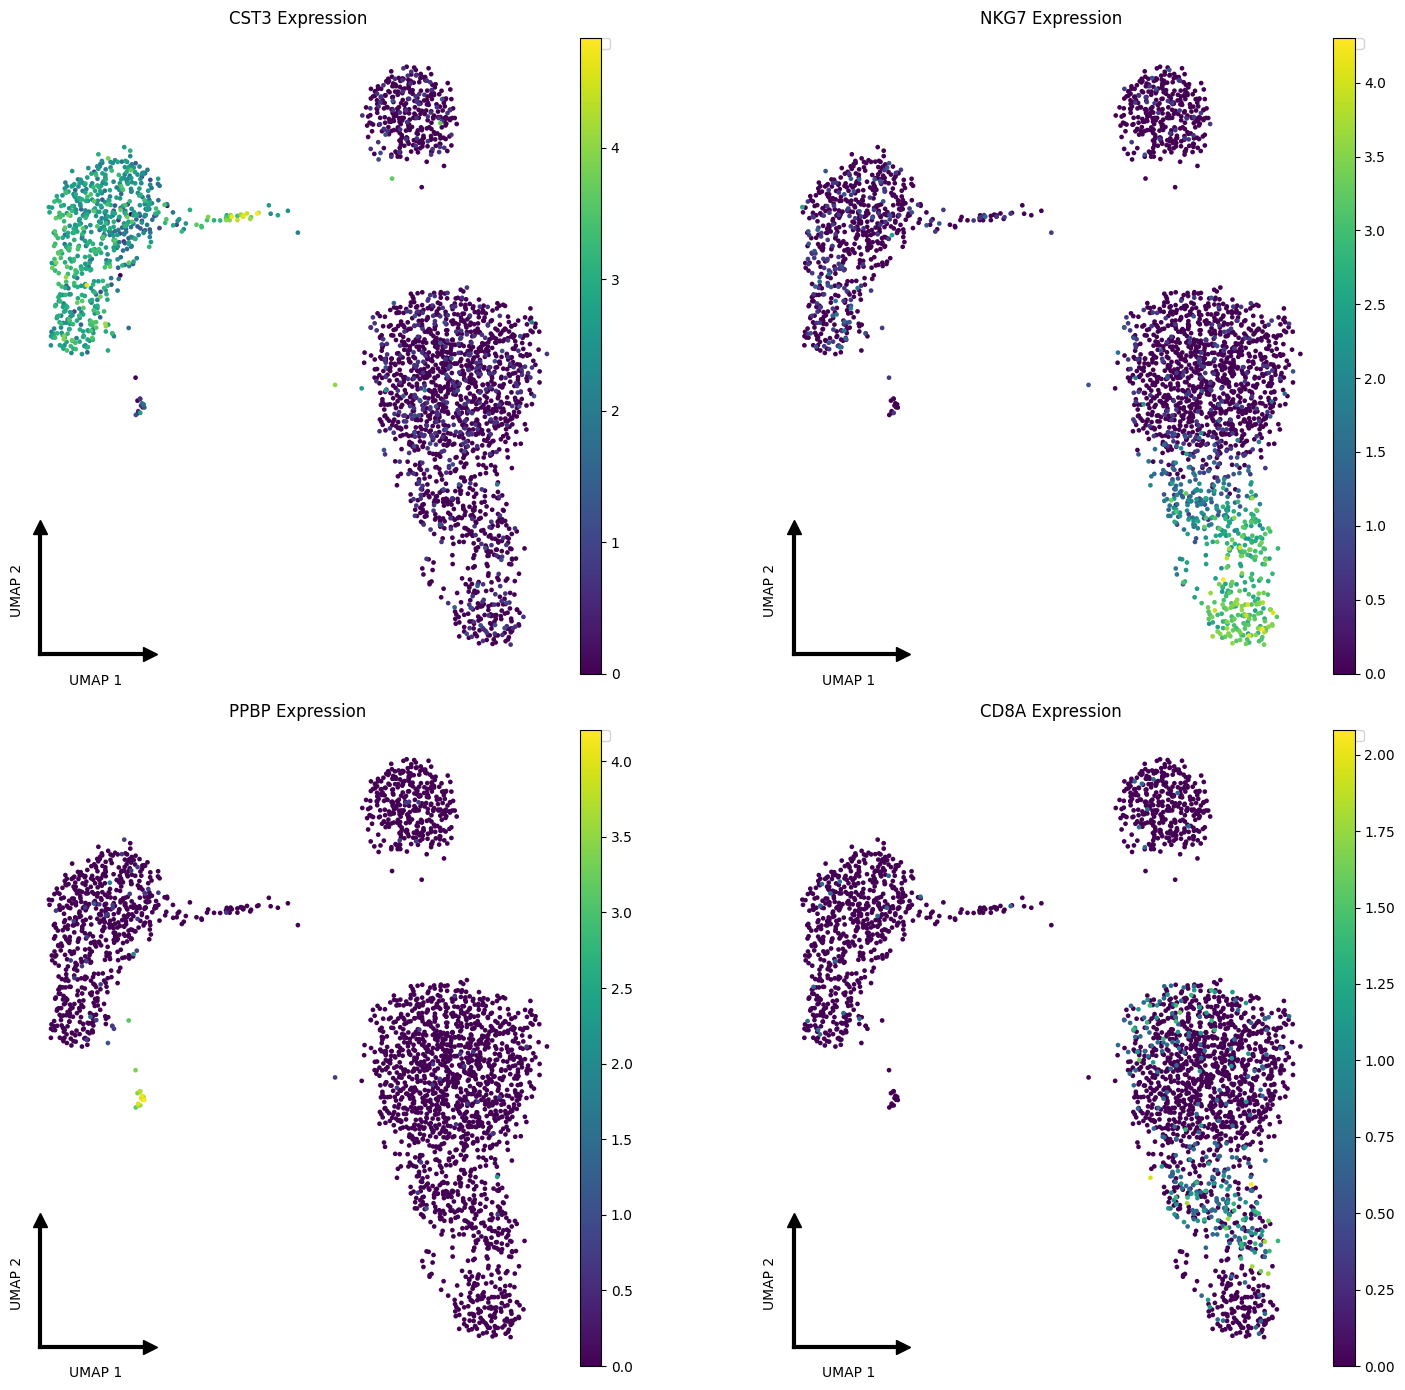

In [4]:
if SCANPY_AVAILABLE:
    # Plot expression of marker genes
    marker_genes = ['CST3', 'NKG7', 'PPBP', 'CD8A']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    
    for i, gene in enumerate(marker_genes):
        bc.clean_umap(adata, color=gene, ax=axes[i], cmap='viridis')
        axes[i].set_title(f'{gene} Expression', fontsize=12, pad=10)
    
    plt.tight_layout()
    plt.show()

### Customizing Axis Indicators

You can customize the appearance of the axis indicators:

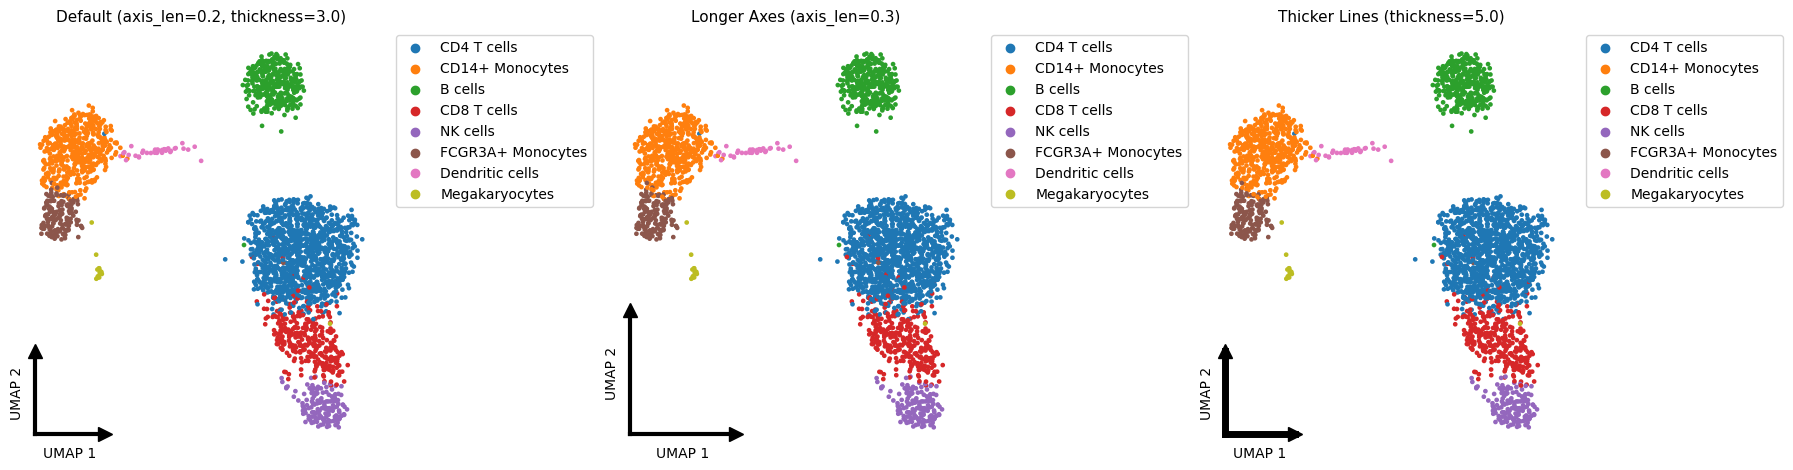

In [5]:
if SCANPY_AVAILABLE:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Default axis length and thickness
    bc.clean_umap(adata, color='louvain', ax=axes[0])
    axes[0].set_title('Default (axis_len=0.2, thickness=3.0)', fontsize=11, pad=10)
    
    # Longer axis indicators
    bc.clean_umap(adata, color='louvain', ax=axes[1], axis_len=0.3)
    axes[1].set_title('Longer Axes (axis_len=0.3)', fontsize=11, pad=10)
    
    # Thicker axis indicators
    bc.clean_umap(adata, color='louvain', ax=axes[2], thickness=5.0)
    axes[2].set_title('Thicker Lines (thickness=5.0)', fontsize=11, pad=10)
    
    plt.tight_layout()
    plt.show()

### Comparison: Standard vs Clean UMAP

Let's compare the standard Scanpy UMAP with BuenColors' clean version:

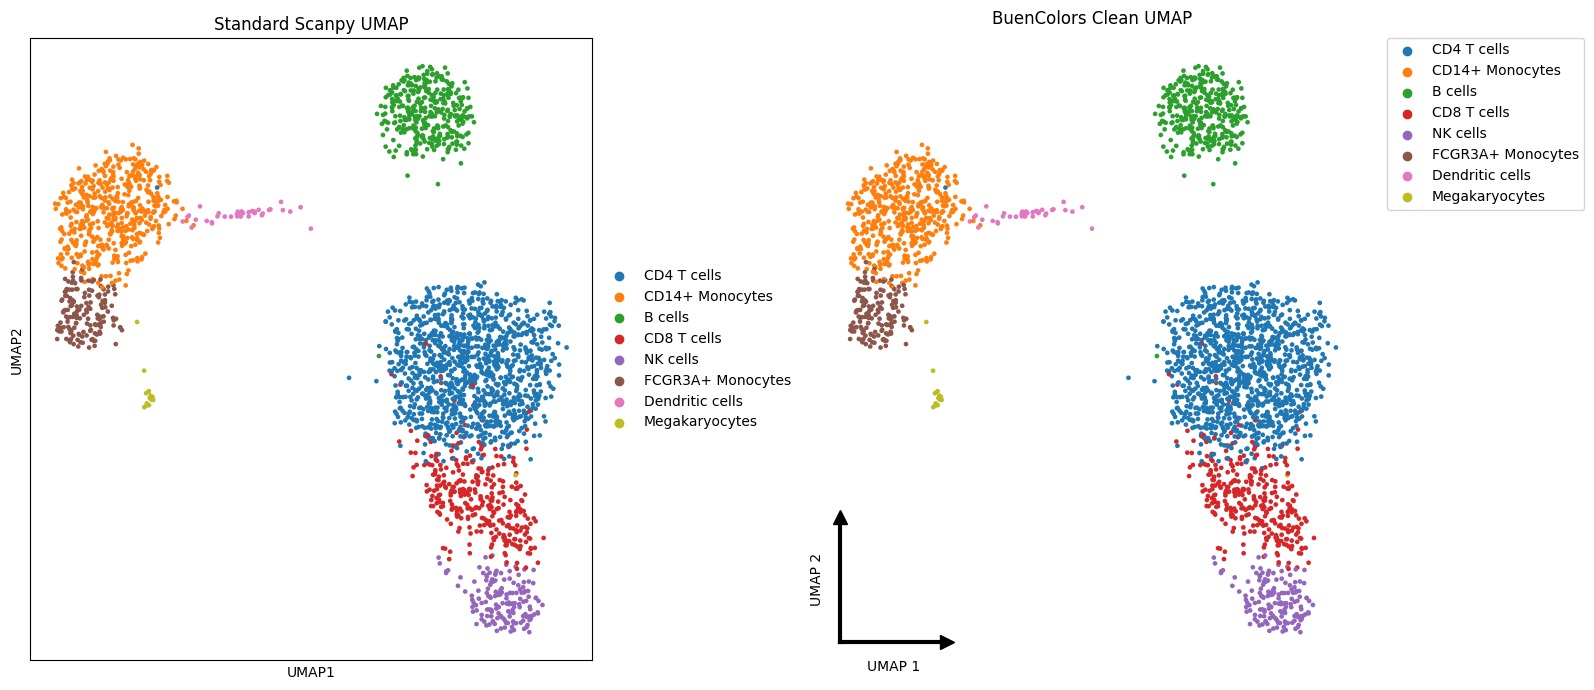

In [6]:
if SCANPY_AVAILABLE:
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Standard Scanpy UMAP
    sc.pl.umap(adata, color='louvain', ax=axes[0], show=False, title='Standard Scanpy UMAP')
    
    # Clean UMAP
    bc.clean_umap(adata, color='louvain', ax=axes[1])
    axes[1].set_title('BuenColors Clean UMAP', fontsize=12, pad=10)
    
    plt.tight_layout()
    plt.show()

### Using BuenColors Palettes with UMAPs

You can combine `clean_umap()` with BuenColors' beautiful color palettes:

<Figure size 1000x800 with 0 Axes>

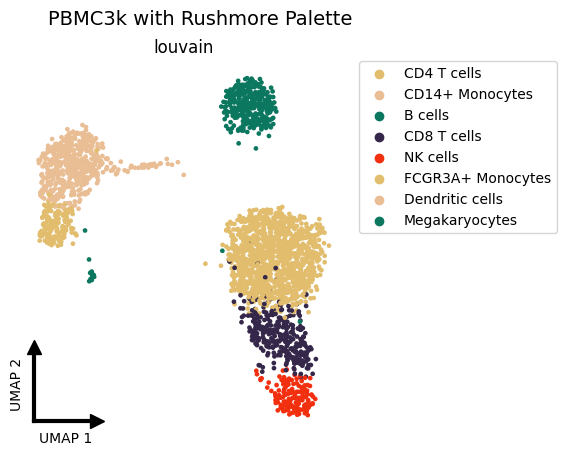

In [7]:
if SCANPY_AVAILABLE:
    # Get a BuenColors palette
    palette_name = 'Rushmore'
    colors = bc.get_palette(palette_name)
    
    # Extend the palette to match the number of clusters
    n_clusters = len(adata.obs['louvain'].cat.categories)
    if len(colors) < n_clusters:
        # Cycle through colors if we need more
        extended_colors = (colors * ((n_clusters // len(colors)) + 1))[:n_clusters]
    else:
        extended_colors = colors[:n_clusters]
    
    plt.figure(figsize=(10, 8))
    bc.clean_umap(adata, color='louvain', palette=extended_colors)
    plt.suptitle(f'PBMC3k with {palette_name} Palette', y=0.98, fontsize=14)
    plt.show()

### Multiple Color Variables

Create a multi-panel figure showing different aspects of your data:

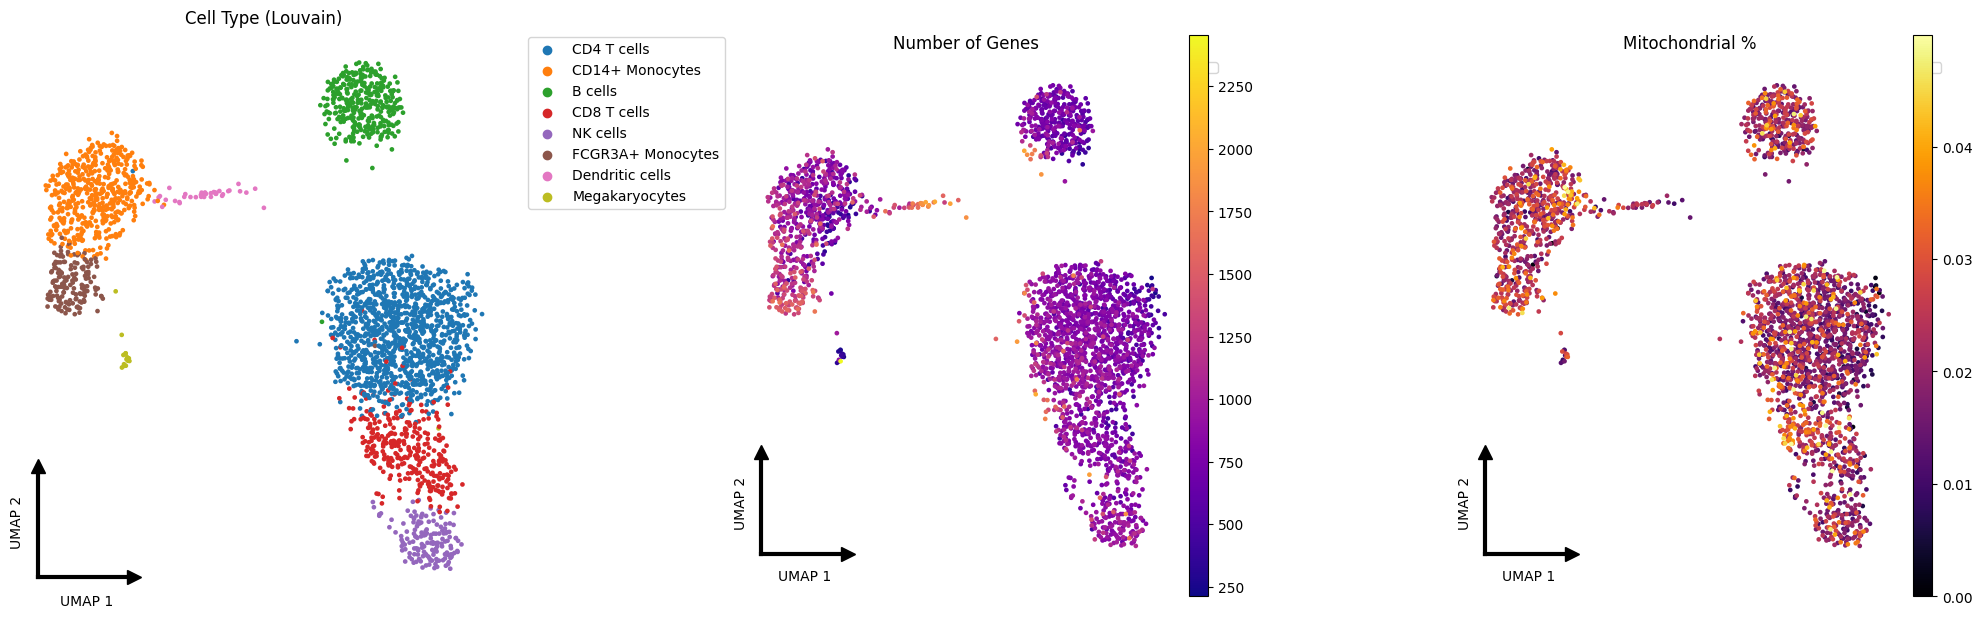

In [8]:
if SCANPY_AVAILABLE:
    # Check available metadata columns
    color_vars = ['louvain', 'n_genes', 'percent_mito']
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    bc.clean_umap(adata, color='louvain', ax=axes[0])
    axes[0].set_title('Cell Type (Louvain)', fontsize=12, pad=10)
    
    bc.clean_umap(adata, color='n_genes', ax=axes[1], cmap='plasma')
    axes[1].set_title('Number of Genes', fontsize=12, pad=10)
    
    bc.clean_umap(adata, color='percent_mito', ax=axes[2], cmap='inferno')
    axes[2].set_title('Mitochondrial %', fontsize=12, pad=10)
    
    plt.tight_layout()
    plt.show()

## Combining with Pretty Plot Style

For even better-looking plots, combine `clean_umap()` with the BuenColors `pretty-plot` style:

<Figure size 2500x2000 with 0 Axes>

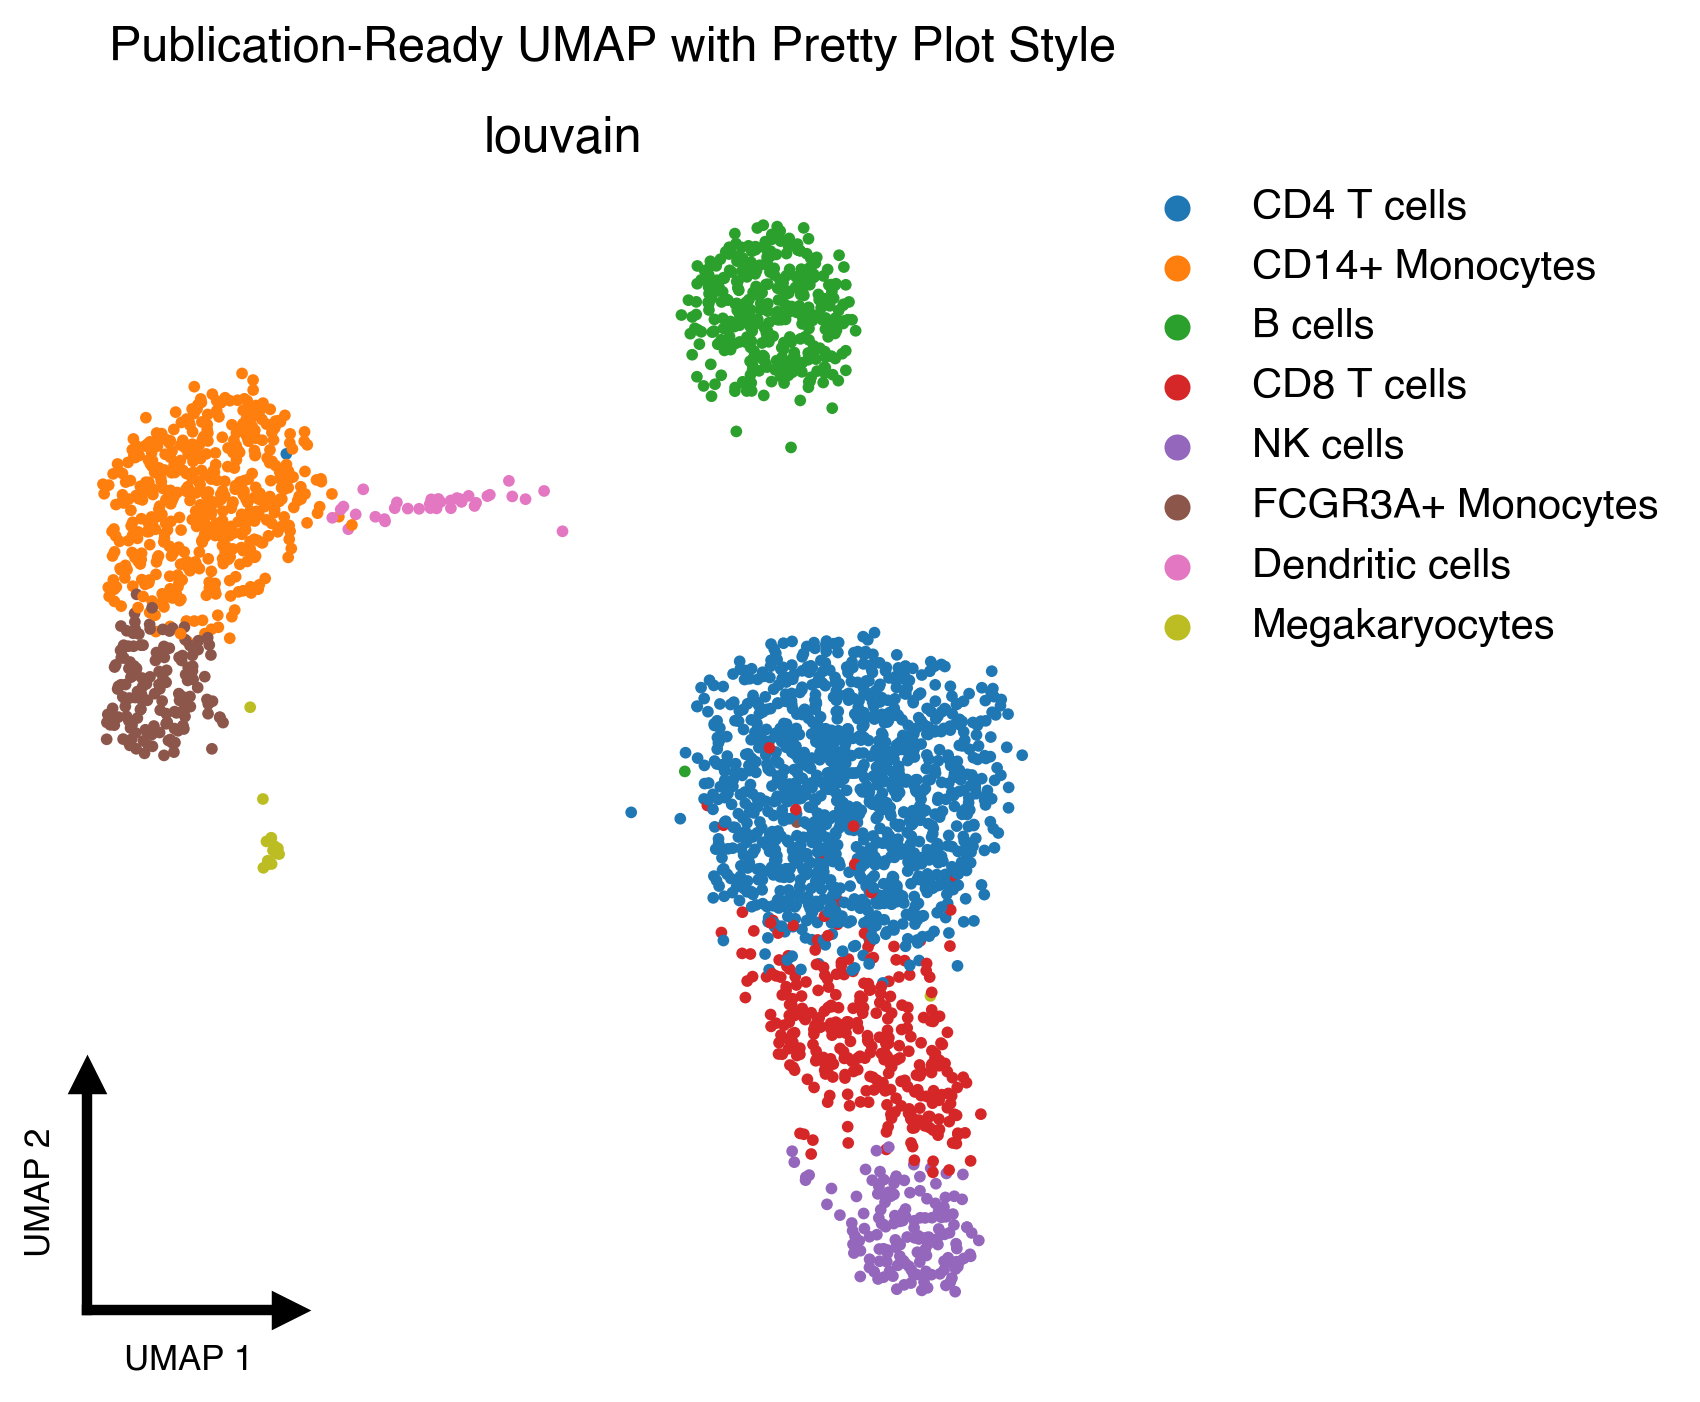

In [9]:
if SCANPY_AVAILABLE:
    # Apply the pretty-plot style
    plt.style.use('pretty-plot')
    
    plt.figure(figsize=(10, 8))
    bc.clean_umap(adata, color='louvain')
    plt.suptitle('Publication-Ready UMAP with Pretty Plot Style', y=0.98, fontsize=14, fontweight='bold')
    plt.show()
    
    # Reset to default style
    plt.style.use('default')

## Summary

The `clean_umap()` function provides:

1. **Minimal decorations** - Clean, publication-ready plots without unnecessary visual clutter
2. **Custom axis indicators** - Professional L-shaped axes with arrowheads
3. **Auto-ejected legends** - Legends placed outside the plot area to avoid obscuring data
4. **Cell shuffling** - Automatic randomization to prevent ordering artifacts
5. **Full customization** - Compatible with all Scanpy UMAP parameters

### Parameters

- `adata`: AnnData object containing UMAP coordinates
- `color`: Column in adata.obs or gene name for coloring
- `ax`: Optional matplotlib axis (if None, creates new)
- `axis_len`: Length of axis indicators (default: 0.2)
- `thickness`: Line width of axis indicators (default: 3.0)
- `**kwargs`: Additional arguments passed to `sc.pl.umap()`

### Compatibility

Requires:
- `anndata` - for AnnData objects
- `scanpy` - for UMAP plotting
- `matplotlib` - for plotting (already a BuenColors dependency)